# Purpose

This jupyter notebook is going to test all the model in the simulating practical application by testing it on another dataset.

We first train all the model again with the old dataset then test it.

The result may be bad because there are 2 dataset with different nature and vocabulary but the result is important to find a way to improve the model.

# Import packages

In [1]:
import numpy as np  # Work with multi-dimenional data
import pandas as pd # Work with relational data
import matplotlib.pyplot as plt # Visualize data
import seaborn as sns # Visualize data base on matplotlib
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from scipy import sparse
from preset_function import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aupho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Dataset

## Practical dataset

This dataset is collected in different sources of the dataset we used for model selection.

In [2]:
import csv

csv_file_path = "data/dataset/practical/new_dataset.csv"

X_test = list()
y_test = list()

with open(csv_file_path, "r", encoding= 'utf-8-sig') as file:
    csv_reader = csv.DictReader(file)

    for row in csv_reader:
        y_test.append(row['Sentiment'])
        X_test.append(row['Content'])

print("Size of the dataset is:", len(X_test))


Size of the dataset is: 23565


Number of labels is: 6
Labels: anger, fear, joy, love, sadness, surprise

----------------------------------------------------------------------------



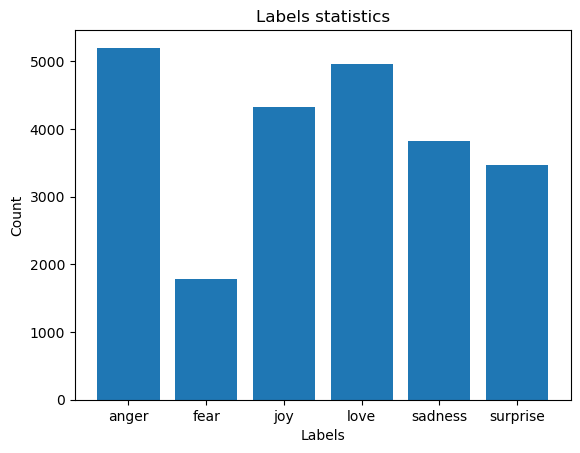

In [3]:
# Number of labels:
labels = np.unique(y_test)
print('Number of labels is: %d' % len(labels))
print('Labels: ' + ', '.join(labels))
print('\n----------------------------------------------------------------------------\n')

# Plot:
df = pd.DataFrame(
  dict(
    labels = labels,
    label_elements_count = [y_test.count(label) for label in labels]
  )
)

plt.title(label='Labels statistics')
plt.xlabel('Labels')
plt.ylabel('Count')

plt.bar('labels', 'label_elements_count', data=df)

plt.show()

## Origin dataset

This is the dataset we used in model selection. In this notebook, we will use all the dataset to train the model

In [4]:
directory = 'data/dataset/raw/'

# This method use to extract all the file in the input list
def extract_data(files):
  data_x_raw = list()
  data_y_raw = list()
  for file in files:
    with open(directory + file) as f:
      for line in f:
        line = line.strip('\n')
        x_raw, y_raw = line.split(sep=';')

        data_x_raw.append(x_raw)
        data_y_raw.append(y_raw)

  return data_x_raw, data_y_raw

In [5]:
X_train, y_train = extract_data(['train.txt', 'val.txt', 'test.txt'])

# Necessary preprocess

In [6]:
file = open("data/stopwords/stop_words_english.txt", 'r', encoding='utf-8')
stopword_list = file.read().split('\n')
file.close()
print(len(stopword_list))

850


In [7]:
file = open("data/stopwords/stop_words_english.txt", 'r', encoding='utf-8')
stop_words = file.read().split('\n')

import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
tmp = stopwords.words('english')

unfiltered_stopwords = stop_words + tmp

print(len(unfiltered_stopwords))

1029


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aupho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stemmer = PorterStemmer()

def unfiltered_tokenize(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in unfiltered_stopwords]
    stems = [stemmer.stem(token) for token in tokens]
    return stems

# Testing

This section will split into 4 subsection since we have 4 ways to process the data

## Bag of words

First we recreate the count vectorizer from the origin dataset. Then, we vectorize 2 dataset with that vectorizer

In [9]:
count_vector = CountVectorizer(stop_words=unfiltered_stopwords, tokenizer=unfiltered_tokenize, ngram_range=(1, 2))
count_vector.fit(X_train)
X_train_bow = count_vector.transform(X_train)
X_test_bow = count_vector.transform(X_test)
dictionary = count_vector.get_feature_names_out()

print("Number of feature of the dataset is:", len(dictionary))

Number of feature of the dataset is: 86216


### kNN

Score of on test are:
	- Accuracy score: 0.1830
	- Micro F1 score: 0.1830
	- Macro F1 score: 0.0798


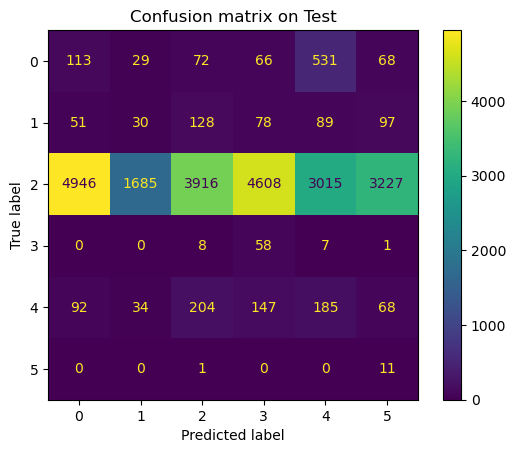

In [10]:
kNN_model = KNeighborsClassifier(n_neighbors = 2, p = 1, weights = 'distance')
kNN_model.fit(X_train_bow, y_train)
evaluate_model(kNN_model, X_train_bow, X_test_bow, y_train, y_test)

### Naive Bayes

Score of on test are:
	- Accuracy score: 0.3059
	- Micro F1 score: 0.3059
	- Macro F1 score: 0.2495


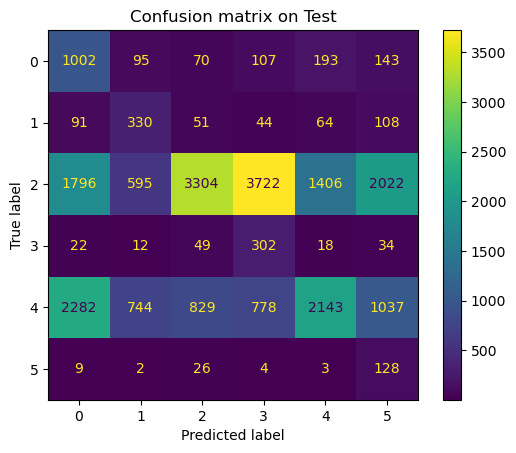

In [11]:
nb_model = MultinomialNB(alpha=0.5)
nb_model.fit(X_train_bow, y_train)
evaluate_model(nb_model, X_train_bow, X_test_bow, y_train, y_test)

### Decision Tree

Score of on test are:
	- Accuracy score: 0.2551
	- Micro F1 score: 0.2551
	- Macro F1 score: 0.1918


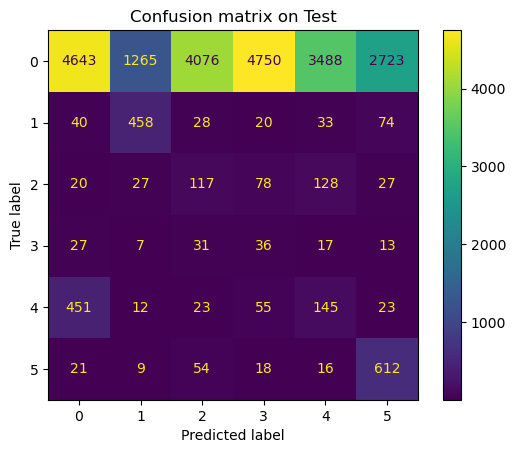

In [12]:
dt_model = DecisionTreeClassifier(max_depth=2500, min_samples_leaf=2, 
                                  min_samples_split=1000, max_leaf_nodes=310)
dt_model.fit(X_train_bow, y_train)
evaluate_model(dt_model, X_train_bow, X_test_bow, y_train, y_test)

### Support vector machine

Score of on test are:
	- Accuracy score: 0.3398
	- Micro F1 score: 0.3398
	- Macro F1 score: 0.3213


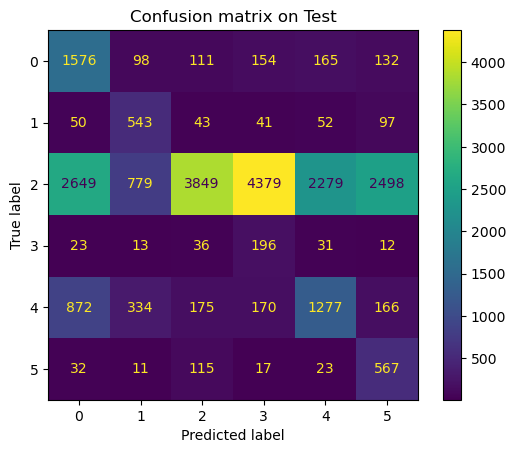

In [13]:
svm_model = SVC(C=50.0, gamma=0.001291549665014884)
svm_model.fit(X_train_bow, y_train)
evaluate_model(svm_model, X_train_bow, X_test_bow, y_train, y_test)

### Logistic Regression (OvR)

Score of on test are:
	- Accuracy score: 0.4564
	- Micro F1 score: 0.4564
	- Macro F1 score: 0.4407


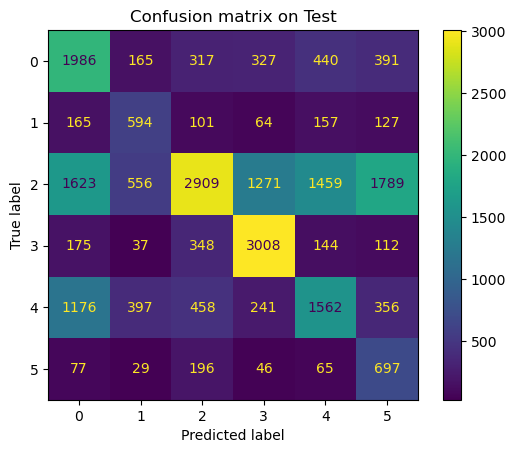

In [14]:
lr_model = LogisticRegression(C=3.1622776601683795, l1_ratio=0.9,
                               multi_class='ovr', penalty='elasticnet', solver='saga')
lr_model.fit(X_train_bow, y_train)
evaluate_model(lr_model, X_train_bow, X_test_bow, y_train, y_test)

### Random forest

Score of on test are:
	- Accuracy score: 0.3806
	- Micro F1 score: 0.3806
	- Macro F1 score: 0.3377


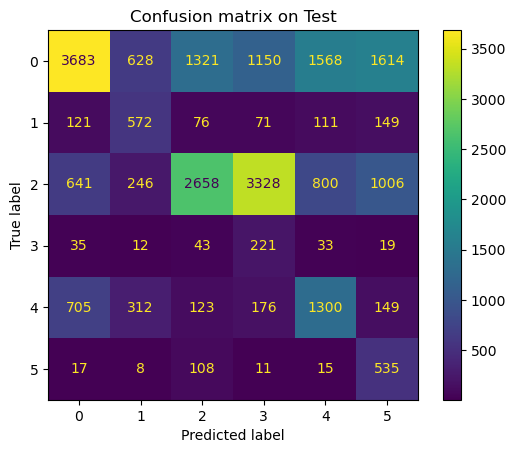

In [15]:
rf_model = RandomForestClassifier(max_depth=1000, max_features=200, min_samples_split=25, n_estimators=512)
rf_model.fit(X_train_bow, y_train)
evaluate_model(rf_model, X_train_bow, X_test_bow, y_train, y_test)

### Softmax regression

Score of on test are:
	- Accuracy score: 0.4366
	- Micro F1 score: 0.4366
	- Macro F1 score: 0.4280


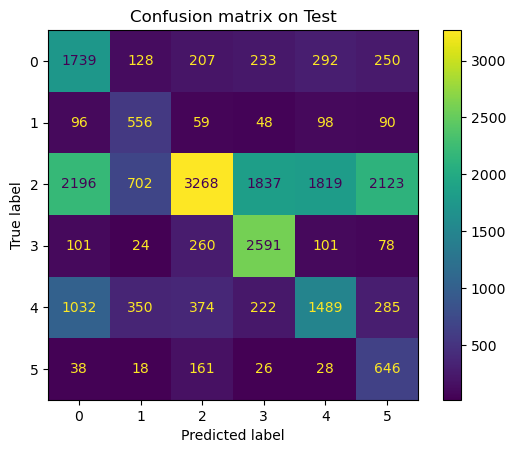

In [16]:
sr_model = LogisticRegression(C=1, l1_ratio=0.9, multi_class='multinomial',
                              penalty='elasticnet', solver='saga')
sr_model.fit(X_train_bow, y_train)
evaluate_model(sr_model, X_train_bow, X_test_bow, y_train, y_test)

## BoW/TF-IDF

In [17]:
tfidf_vector = TfidfVectorizer(stop_words=unfiltered_stopwords, tokenizer=unfiltered_tokenize, ngram_range=(1, 2))
tfidf_vector.fit(X_train)
X_train_tfidf = tfidf_vector.transform(X_train)
X_test_tfidf = tfidf_vector.transform(X_test)

### kNN

Score of on test are:
	- Accuracy score: 0.4419
	- Micro F1 score: 0.4419
	- Macro F1 score: 0.4208


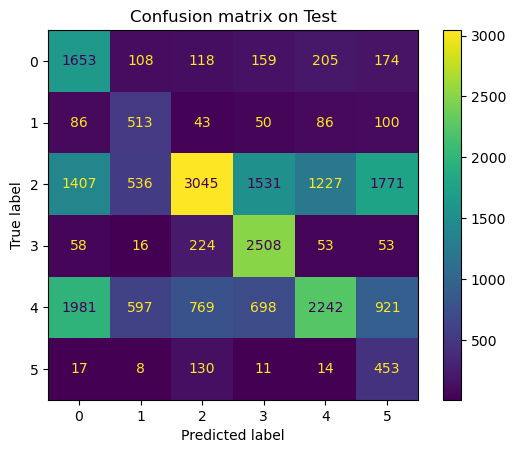

In [18]:
kNN_model = KNeighborsClassifier(n_neighbors = 24, p = 2, weights = 'uniform')
kNN_model.fit(X_train_tfidf, y_train)
evaluate_model(kNN_model, X_train_tfidf, X_test_tfidf, y_train, y_test)

### Naive Bayes

Score of on test are:
	- Accuracy score: 0.2759
	- Micro F1 score: 0.2759
	- Macro F1 score: 0.2106


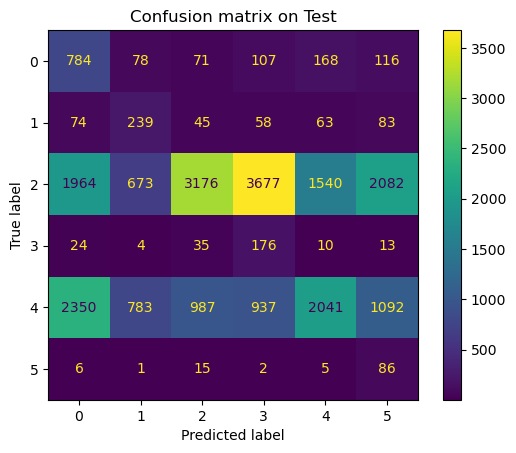

In [19]:
nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train_tfidf, y_train)
evaluate_model(nb_model, X_train_tfidf, X_test_tfidf, y_train, y_test)

### Decision Tree

Score of on test are:
	- Accuracy score: 0.2502
	- Micro F1 score: 0.2502
	- Macro F1 score: 0.1833


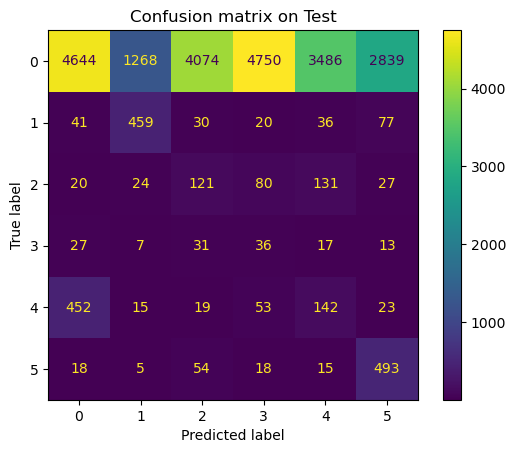

In [20]:
dt_model = DecisionTreeClassifier(max_depth=2000, min_samples_leaf=3,
                                  min_samples_split=500, max_leaf_nodes=250)
dt_model.fit(X_train_tfidf, y_train)
evaluate_model(dt_model, X_train_tfidf, X_test_tfidf, y_train, y_test)

### Support vector machine

Score of on test are:
	- Accuracy score: 0.4382
	- Micro F1 score: 0.4382
	- Macro F1 score: 0.4283


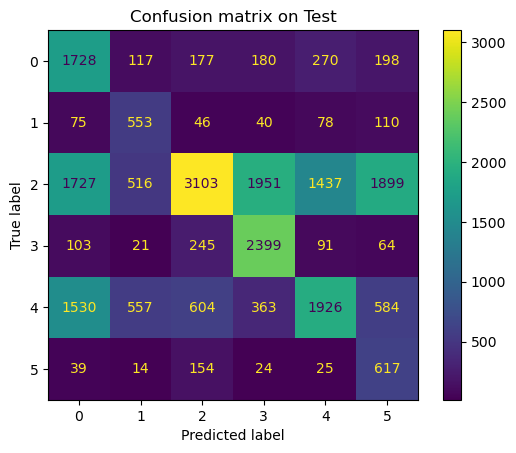

In [21]:
svm_model = SVC(kernel='linear', C=1.25)
svm_model.fit(X_train_tfidf, y_train)
evaluate_model(svm_model, X_train_tfidf, X_test_tfidf, y_train, y_test)

### Logistic Regression (OvR)

Score of on test are:
	- Accuracy score: 0.4256
	- Micro F1 score: 0.4256
	- Macro F1 score: 0.4125


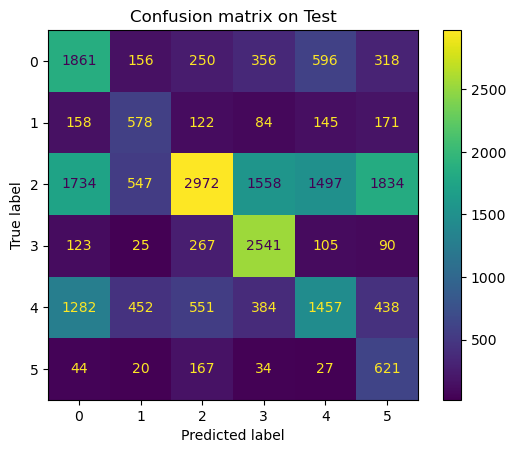

In [22]:
lr_model = LogisticRegression(C=25.118864315095795, l1_ratio=0.9, multi_class='ovr',
                              penalty='elasticnet', solver='saga')
lr_model.fit(X_train_tfidf, y_train)
evaluate_model(lr_model, X_train_tfidf, X_test_tfidf, y_train, y_test)

### Random forest

Score of on test are:
	- Accuracy score: 0.4103
	- Micro F1 score: 0.4103
	- Macro F1 score: 0.3861


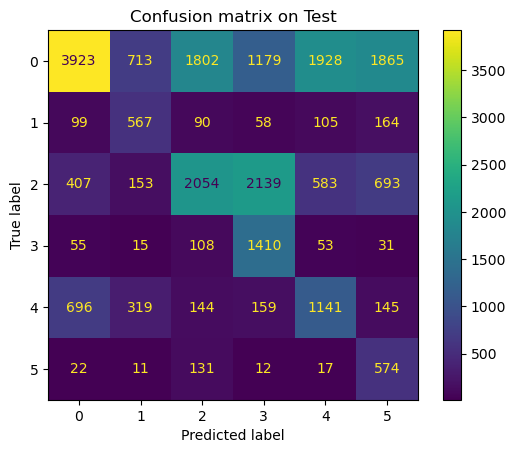

In [23]:
rf_model = RandomForestClassifier(max_depth=5000, max_features=300, min_samples_split=25, n_estimators=256)
rf_model.fit(X_train_tfidf, y_train)
evaluate_model(rf_model, X_train_tfidf, X_test_tfidf, y_train, y_test)

### Softmax regression

Score of on test are:
	- Accuracy score: 0.4494
	- Micro F1 score: 0.4494
	- Macro F1 score: 0.4369


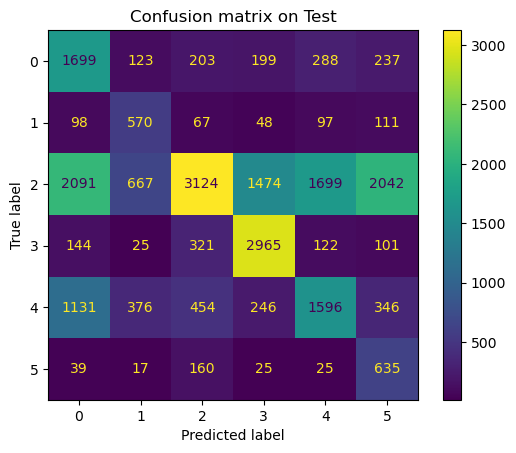

In [24]:
sr_model = LogisticRegression(C=3.1622776601683795, l1_ratio=0.9,
                            multi_class='multinomial', penalty='elasticnet', solver='saga')
sr_model.fit(X_train_tfidf, y_train)
evaluate_model(sr_model, X_train_tfidf, X_test_tfidf, y_train, y_test)

## Bag of words (L1 regularization removal)

Find new list of stop words using L1 regularization of softmax regression:

In [25]:
# Dictionary semi_mono: Using basic filters, containing only 1-gram, used to perform LASSO-filter to obtain L1 dict

count_vector = CountVectorizer(stop_words=unfiltered_stopwords, tokenizer=unfiltered_tokenize, ngram_range=(1, 1))
count_vector.fit(X_train)
X_train_bow_semi_mono = count_vector.transform(X_train)
dictionary_semi_mono = count_vector.get_feature_names_out()

linear_semi_mono = LogisticRegression(penalty='l1', solver='saga', random_state = 42)
linear_semi_mono.fit(X_train_bow_semi_mono, y_train)

lin_coef = linear_semi_mono.coef_.T

useless = list()
for i in range(lin_coef.shape[0]):
    if (lin_coef[i] == np.zeros((lin_coef.shape[1]))).all():
        useless.append(dictionary_semi_mono[i])

L1_stopwords = unfiltered_stopwords + useless
print("Length of new stopwords list:", len(L1_stopwords))

Length of new stopwords list: 10610


Vectorize in the new way:

In [26]:
def useless_tokenize(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in L1_stopwords]
    stems = [stemmer.stem(token) for token in tokens]
    return stems

count_vector = CountVectorizer(stop_words=L1_stopwords, tokenizer=useless_tokenize, ngram_range=(1, 2))
count_vector.fit(X_train)
X_train_bow_L1 = count_vector.transform(X_train)
X_test_bow_L1 = count_vector.transform(X_test)
dictionary_L1 = count_vector.get_feature_names_out()

In [27]:
print(len(dictionary_L1))

46026


### kNN

Score of on test are:
	- Accuracy score: 0.1032
	- Micro F1 score: 0.1032
	- Macro F1 score: 0.0694


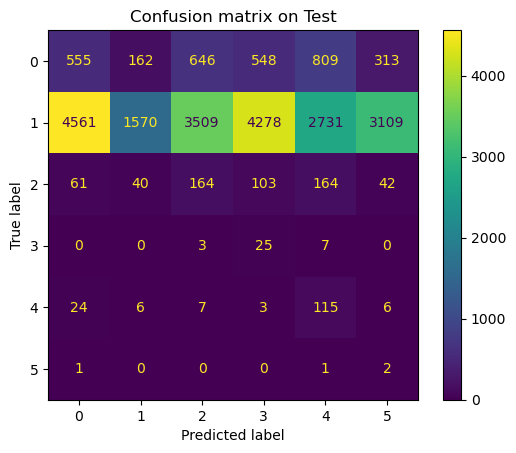

In [28]:
kNN_model = KNeighborsClassifier(n_neighbors = 3, p = 1, weights = 'uniform')
kNN_model.fit(X_train_bow_L1, y_train)
evaluate_model(kNN_model, X_train_bow_L1, X_test_bow_L1, y_train, y_test)

### Naive Bayes

Score of on test are:
	- Accuracy score: 0.3274
	- Micro F1 score: 0.3274
	- Macro F1 score: 0.2873


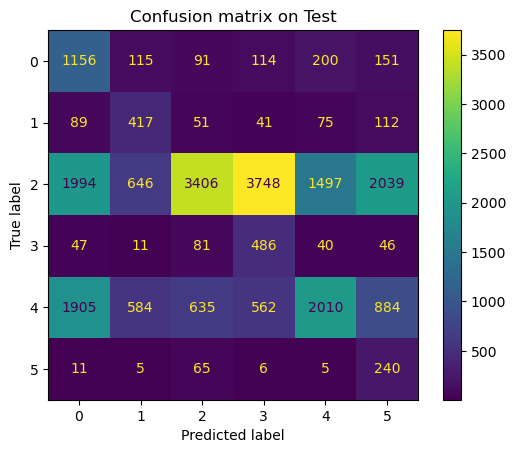

In [29]:
nb_model = MultinomialNB(alpha=0.3)
nb_model.fit(X_train_bow_L1, y_train)
evaluate_model(nb_model, X_train_bow_L1, X_test_bow_L1, y_train, y_test)

### Decision Tree

Score of on test are:
	- Accuracy score: 0.2482
	- Micro F1 score: 0.2482
	- Macro F1 score: 0.1738


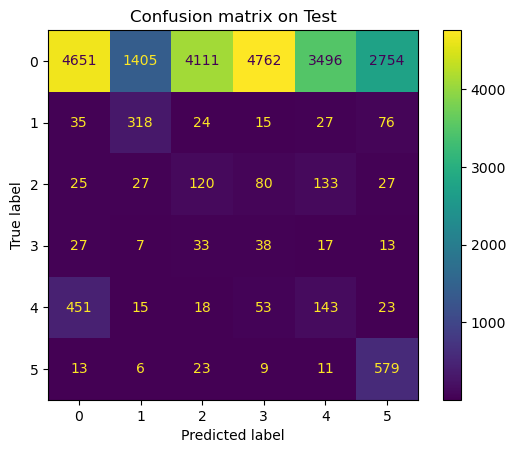

In [30]:
dt_model = DecisionTreeClassifier(max_depth=300, min_samples_split=1000, max_leaf_nodes=340)
dt_model.fit(X_train_bow_L1, y_train)
evaluate_model(dt_model, X_train_bow_L1, X_test_bow_L1, y_train, y_test)

### Support vector machine

Score of on test are:
	- Accuracy score: 0.3352
	- Micro F1 score: 0.3352
	- Macro F1 score: 0.3151


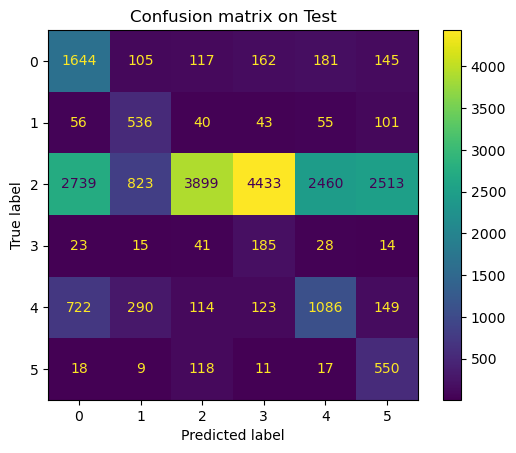

In [31]:
svm_model = SVC(C=60.0, gamma=0.0016681005372000592)
svm_model.fit(X_train_bow_L1, y_train)
evaluate_model(svm_model, X_train_bow_L1, X_test_bow_L1, y_train, y_test)

### Logistic Regression (OvR)

Score of on test are:
	- Accuracy score: 0.4516
	- Micro F1 score: 0.4516
	- Macro F1 score: 0.4335


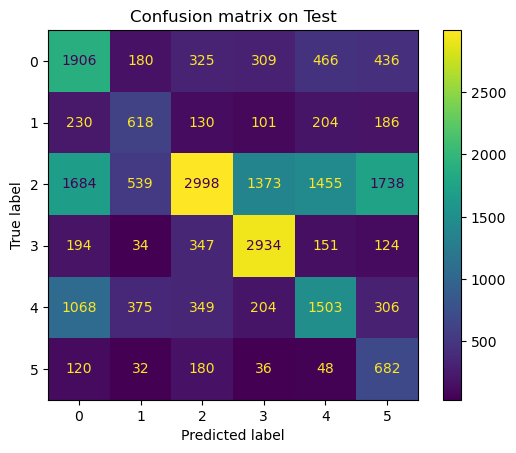

In [32]:
lr_model = LogisticRegression(C=3.1622776601683795, l1_ratio=0.5, 
                              multi_class='ovr',penalty='elasticnet', solver='saga')
lr_model.fit(X_train_bow_L1, y_train)
evaluate_model(lr_model, X_train_bow_L1, X_test_bow_L1, y_train, y_test)

### Random forest

Score of on test are:
	- Accuracy score: 0.3425
	- Micro F1 score: 0.3425
	- Macro F1 score: 0.3020


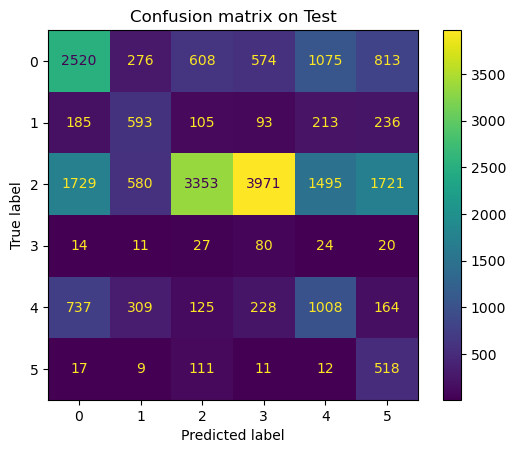

In [33]:
rf_model = RandomForestClassifier(max_depth=1000, max_features=100, 
                                  min_samples_split=25, n_estimators=256)
rf_model.fit(X_train_bow_L1, y_train)
evaluate_model(rf_model, X_train_bow_L1, X_test_bow_L1, y_train, y_test)

### Softmax regression

Score of on test are:
	- Accuracy score: 0.4273
	- Micro F1 score: 0.4273
	- Macro F1 score: 0.4187


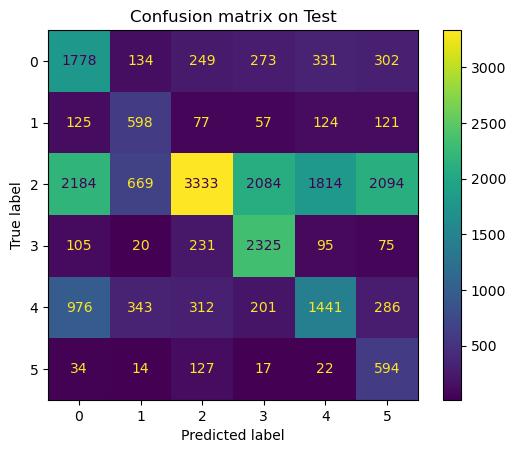

In [34]:
sr_model = LogisticRegression(C=1, penalty='l1', solver='saga', multi_class='multinomial')
sr_model.fit(X_train_bow_L1, y_train)
evaluate_model(sr_model, X_train_bow_L1, X_test_bow_L1, y_train, y_test)

## BoW/TF-IDF (L1 regularization removal)

In [35]:
tfidf_vector = TfidfVectorizer(stop_words=L1_stopwords, tokenizer=useless_tokenize, ngram_range=(1, 2))
tfidf_vector.fit(X_train)
X_train_tfidf_L1 = tfidf_vector.transform(X_train)
X_test_tfidf_L1 = tfidf_vector.transform(X_test)

### kNN

Score of on test are:
	- Accuracy score: 0.4364
	- Micro F1 score: 0.4364
	- Macro F1 score: 0.4126


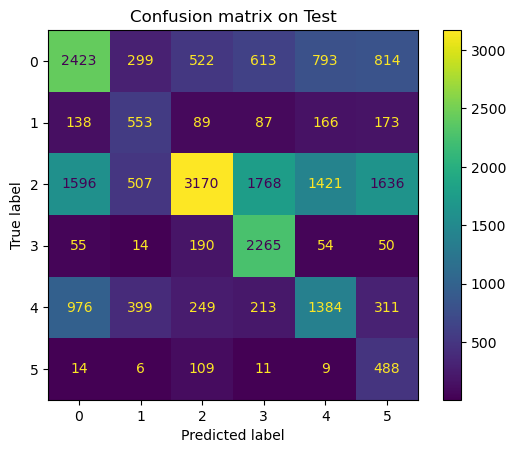

In [36]:
kNN_model = KNeighborsClassifier(n_neighbors = 40, p = 2, weights = 'distance')
kNN_model.fit(X_train_tfidf_L1, y_train)
evaluate_model(kNN_model, X_train_tfidf_L1, X_test_tfidf_L1, y_train, y_test)

### Naive Bayes

Score of on test are:
	- Accuracy score: 0.3036
	- Micro F1 score: 0.3036
	- Macro F1 score: 0.2533


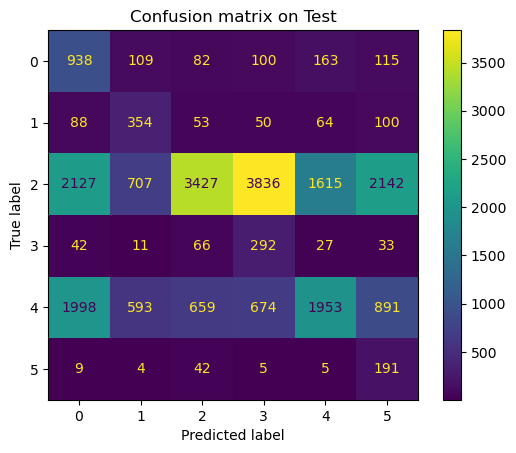

In [37]:
nb_model = MultinomialNB(alpha=0.075)
nb_model.fit(X_train_tfidf_L1, y_train)
evaluate_model(nb_model, X_train_tfidf_L1, X_test_tfidf_L1, y_train, y_test)

### Decision Tree

Score of on test are:
	- Accuracy score: 0.2478
	- Micro F1 score: 0.2478
	- Macro F1 score: 0.1728


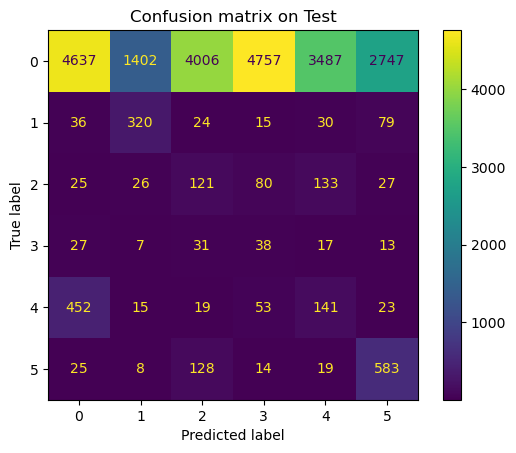

In [38]:
dt_model = DecisionTreeClassifier(max_depth=2000, min_samples_leaf=4,
                                  min_samples_split=500, max_leaf_nodes=253)
dt_model.fit(X_train_tfidf_L1, y_train)
evaluate_model(dt_model, X_train_tfidf_L1, X_test_tfidf_L1, y_train, y_test)

### Support vector machine

Score of on test are:
	- Accuracy score: 0.4393
	- Micro F1 score: 0.4393
	- Macro F1 score: 0.4280


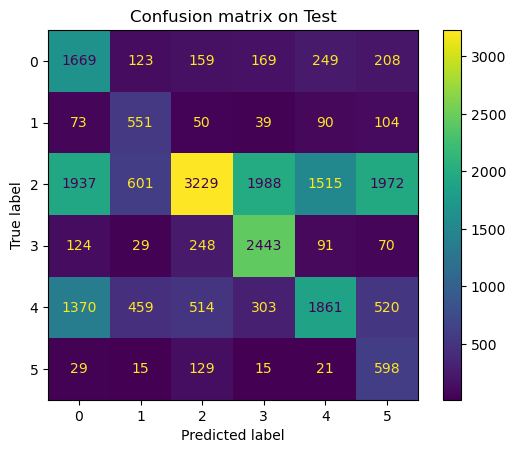

In [39]:
svm_model = SVC(C=56.0, gamma=0.01)
svm_model.fit(X_train_tfidf_L1, y_train)
evaluate_model(svm_model, X_train_tfidf_L1, X_test_tfidf_L1, y_train, y_test)

### Logistic Regression (OvR)

Score of on test are:
	- Accuracy score: 0.4255
	- Micro F1 score: 0.4255
	- Macro F1 score: 0.4118


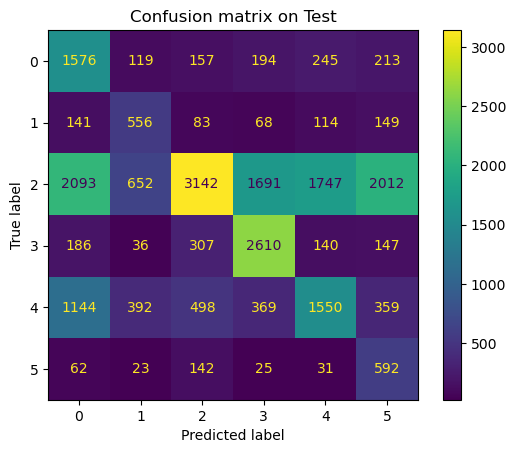

In [40]:
lr_model = LogisticRegression(C=4.5, penalty='l1', solver='liblinear', multi_class='ovr')
lr_model.fit(X_train_tfidf_L1, y_train)
evaluate_model(lr_model, X_train_tfidf_L1, X_test_tfidf_L1, y_train, y_test)

### Random forest

Score of on test are:
	- Accuracy score: 0.3698
	- Micro F1 score: 0.3698
	- Macro F1 score: 0.3250


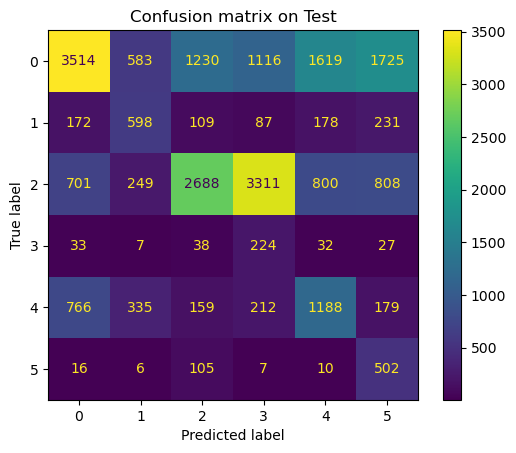

In [41]:
rf_model = RandomForestClassifier(max_depth=2000, max_features=100, min_samples_split=25, n_estimators=256)
rf_model.fit(X_train_tfidf_L1, y_train)
evaluate_model(rf_model, X_train_tfidf_L1, X_test_tfidf_L1, y_train, y_test)

### Softmax regression

Score of on test are:
	- Accuracy score: 0.4482
	- Micro F1 score: 0.4482
	- Macro F1 score: 0.4348


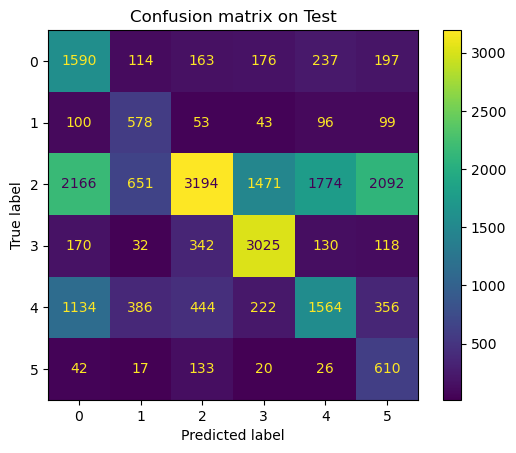

In [42]:
sr_model = LogisticRegression(C=2, penalty='l1', solver='saga', multi_class='multinomial')
sr_model.fit(X_train_tfidf_L1, y_train)
evaluate_model(sr_model, X_train_tfidf_L1, X_test_tfidf_L1, y_train, y_test)